In [1]:
# GreedyGame_Sikka_Assignment#


# importing Libraries

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
User_signup = pd.read_csv("Q2_users signup.csv")
offer_completion = pd.read_csv("Q2_User offer completion data (1).csv")
Rewards_Details = pd.read_csv("Q2_rewards details.csv")
User_initiated_offer_data = pd.read_csv("Q2_User offer data.csv")

# Data preparation 

# 1.User_signup_Data

In [4]:
User_signup.head()


,user_id,app_id,signed_up_on,last_login_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26
1,7cdb9d2c-9644-42d0-8d44-50fa57747523,sikka,2022-11-26,2022-11-26
2,e2dfd115-a8b0-4e3e-96e5-9b11e5f316f1,sikka,2022-11-26,2022-11-28
3,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27
4,a6d5ed73-5c1c-4666-a592-f93ab4489cf5,sikka,2022-11-26,2022-11-26


In [5]:
User_signup.columns

Index(['user_id', 'app_id', 'signed_up_on', 'last_login_date'], dtype='object')

In [6]:
User_signup.dtypes


user_id            object
app_id             object
signed_up_on       object
last_login_date    object
dtype: object

In [7]:
User_signup.isnull().sum()

user_id            0
app_id             0
signed_up_on       0
last_login_date    0
dtype: int64

In [8]:
User_signup.shape

(100, 4)

In [9]:

User_signup['last_login_date'] = pd.to_datetime(User_signup['last_login_date']).dt.date
User_signup['signed_up_on'] = pd.to_datetime(User_signup['signed_up_on'])

In [10]:
User_signup.dtypes

user_id                    object
app_id                     object
signed_up_on       datetime64[ns]
last_login_date            object
dtype: object

# 2.User offer completion data: 

In [11]:
offer_completion.head()

,Unnamed: 0,reward_id,user_id,date,app_id
0,0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


In [12]:
#Dropping 'Unnamed: 0 column 
offer_completion = offer_completion.drop('Unnamed: 0',axis = 1)

In [13]:
offer_completion.head()

,reward_id,user_id,date,app_id
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka


In [14]:
offer_completion.shape

(70, 4)

In [15]:
offer_completion.isnull().sum()

reward_id    0
user_id      0
date         0
app_id       0
dtype: int64

In [16]:
offer_completion.dtypes

reward_id     int64
user_id      object
date         object
app_id       object
dtype: object

In [17]:
#conversting to datetime
offer_completion['date'] = pd.to_datetime(offer_completion['date'])

In [18]:
offer_completion.dtypes

reward_id             int64
user_id              object
date         datetime64[ns]
app_id               object
dtype: object

# 3.Rewards details: 

In [19]:
Rewards_Details.head()

,Unnamed: 0,offer_id,reward_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,0,369,451,Download APK,500,0
1,1,400,488,Download,30,0
2,2,402,491,Download,500,0
3,3,447,541,Register on App,500,0
4,4,478,586,Complete Registration,500,0


In [20]:
#Dropping 'Unnamed: 0 column 
Rewards_Details = Rewards_Details.drop('Unnamed: 0',axis = 1)

In [21]:
Rewards_Details.shape

(2716, 5)

In [22]:
Rewards_Details.isnull().sum()

offer_id                   0
reward_id                  0
label_in_english          15
total_payout_in_paise      0
total_revenue_in_paise     0
dtype: int64

# 4.offer_inititation


In [23]:
User_initiated_offer_data.head()

,Unnamed: 0,user_id,offer_id,status,started_at,completed_at,expires_at
0,0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,792,ONGOING,2022-11-26 07:25:38.995614+00:00,NaN,2022-11-27 18:29:59+00:00
1,1,e5c792a3-9cd9-4d10-a7b5-e5ee0f0f5fad,3462,ONGOING,2022-11-26 01:19:42.059483+00:00,NaN,2022-11-28 01:19:42.066140+00:00
2,2,033c38d4-fd46-45a2-b09a-18d637c54129,3462,ONGOING,2022-11-26 14:12:39.365453+00:00,NaN,2022-11-28 14:12:39.369689+00:00
3,3,8a488246-83d3-4028-b216-85ee8c3e504d,2328,ONGOING,2022-11-26 02:51:44.438026+00:00,NaN,2022-11-28 02:51:44.441869+00:00
4,4,aff26172-41d6-4e69-9b02-48011fe35804,3467,ONGOING,2022-11-26 11:44:25.915581+00:00,NaN,2022-11-28 11:44:25.921249+00:00


In [24]:

User_initiated_offer_data.shape

(499, 7)

In [25]:
User_initiated_offer_data.isnull().sum()

Unnamed: 0        0
user_id           0
offer_id          0
status            0
started_at        0
completed_at    436
expires_at       63
dtype: int64

In [26]:
User_initiated_offer_data['status'].value_counts()

ONGOING      436
COMPLETED     63
Name: status, dtype: int64

In [27]:
User_initiated_offer_data['started_at']= pd.to_datetime(User_initiated_offer_data['started_at'])

In [28]:
User_initiated_offer_data=User_initiated_offer_data.drop('Unnamed: 0',axis = 1)

# "Sikka" & "Sikka pro" App perfoermance

In [29]:
#1. Offer Initiation by users  

In [30]:
# merge User_signup and User_initiated_offer_data
User_initiated = pd.merge(User_signup,User_initiated_offer_data,on='user_id')
User_initiated.head()

,user_id,app_id,signed_up_on,last_login_date,offer_id,status,started_at,completed_at,expires_at
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3534,ONGOING,2022-11-26 00:05:44.859932+00:00,NaN,2022-11-28 00:05:44.865124+00:00
1,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3505,ONGOING,2022-11-26 00:19:47.467175+00:00,NaN,2022-11-28 00:19:47.470456+00:00
2,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3237,ONGOING,2022-11-26 00:20:42.687283+00:00,NaN,2022-11-28 00:20:42.692107+00:00
3,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3451,ONGOING,2022-11-26 00:21:33.127670+00:00,NaN,2022-11-28 00:21:33.133124+00:00
4,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,792,ONGOING,2022-11-26 00:26:52.872562+00:00,NaN,2022-11-27 18:29:59+00:00


In [31]:
User_initiated['started_date'] = User_initiated['started_at'].dt.date

In [32]:
User_initiated

,user_id,app_id,signed_up_on,last_login_date,offer_id,status,started_at,completed_at,expires_at,started_date
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3534,ONGOING,2022-11-26 00:05:44.859932+00:00,NaN,2022-11-28 00:05:44.865124+00:00,2022-11-26
1,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3505,ONGOING,2022-11-26 00:19:47.467175+00:00,NaN,2022-11-28 00:19:47.470456+00:00,2022-11-26
2,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3237,ONGOING,2022-11-26 00:20:42.687283+00:00,NaN,2022-11-28 00:20:42.692107+00:00,2022-11-26
3,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,3451,ONGOING,2022-11-26 00:21:33.127670+00:00,NaN,2022-11-28 00:21:33.133124+00:00,2022-11-26
4,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,792,ONGOING,2022-11-26 00:26:52.872562+00:00,NaN,2022-11-27 18:29:59+00:00,2022-11-26
...,...,...,...,...,...,...,...,...,...,...
494,a83cc0e7-637c-464c-b6ad-407c6c94a633,sikka_pro,2022-11-26,2022-11-27,3467,ONGOING,2022-11-27 03:32:03.015874+00:00,NaN,2022-11-29 03:32:03.019915+00:00,2022-11-27
495,a83cc0e7-637c-464c-b6ad-407c6c94a633,sikka_pro,2022-11-26,2022-11-27,3534,ONGOING,2022-11-26 19:47:55.014956+00:00,NaN,2022-11-28 19:47:55.020688+00:00,2022-11-26
496,18f9d5c1-c378-4c3a-b829-f5d81ca03653,sikka_pro,2022-11-26,2022-11-27,3503,ONGOING,2022-11-27 16:26:43.350650+00:00,NaN,2022-11-29 16:26:43.355433+00:00,2022-11-27
497,18f9d5c1-c378-4c3a-b829-f5d81ca03653,sikka_pro,2022-11-26,2022-11-27,3467,ONGOING,2022-11-26 19:47:46.780309+00:00,NaN,2022-11-28 19:47:46.783803+00:00,2022-11-26


In [33]:
#grouping_per_day

In [34]:
App_user_per_day = User_initiated.groupby(['app_id','started_date'])['user_id'].count().reset_index()
App_user_per_day 

,app_id,started_date,user_id
0,sikka,2022-11-26,177
1,sikka,2022-11-27,28
2,sikka,2022-11-28,35
3,sikka,2022-11-29,22
4,sikka_pro,2022-11-26,111
5,sikka_pro,2022-11-27,48
6,sikka_pro,2022-11-28,54
7,sikka_pro,2022-11-29,24


In [35]:
App_user_per_day = App_user_per_day.rename(columns={'user_id':'user_count'})
App_user_per_day

,app_id,started_date,user_count
0,sikka,2022-11-26,177
1,sikka,2022-11-27,28
2,sikka,2022-11-28,35
3,sikka,2022-11-29,22
4,sikka_pro,2022-11-26,111
5,sikka_pro,2022-11-27,48
6,sikka_pro,2022-11-28,54
7,sikka_pro,2022-11-29,24


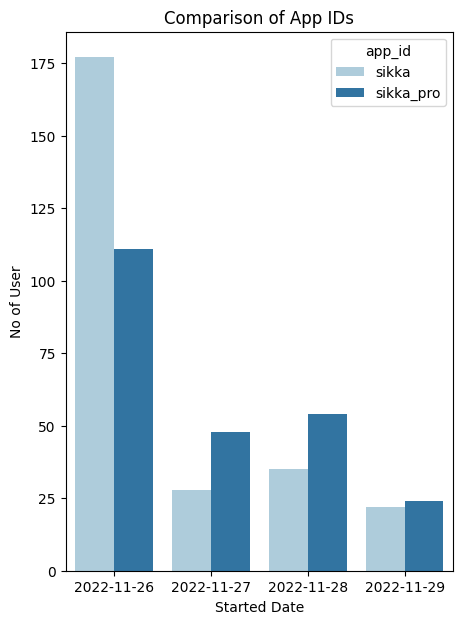

In [61]:
#visulaization_for_better_understanding
plt.figure(figsize= (5,7))
sns.barplot(x='started_date',y='user_count',data= App_user_per_day , hue ='app_id',palette = 'Paired')
plt.xlabel('Started Date')
plt.ylabel('No of User')
plt.title('Comparison of App IDs')
plt.show()







In [37]:
#Grouping data by 'app_id' to get total user count for each app.

Total_users_per_app = User_initiated.groupby('app_id')['user_id'].count().reset_index()
Total_users_per_app

,app_id,user_id
0,sikka,262
1,sikka_pro,237


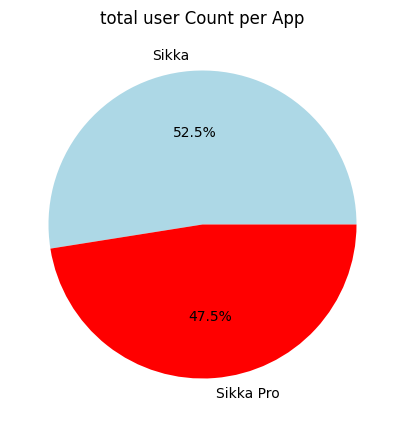

In [38]:
# plotting a pie chart
plt.figure(figsize = [5,5])
sns.color_palette(palette="Paired")
plt.pie(Total_users_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors =['lightblue','red'])
plt.title('total user Count per App')
plt.show()

In [39]:
#user_offer_completion
offer_completion 


,reward_id,user_id,date,app_id
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
...,...,...,...,...
65,3722,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro
66,3705,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-27,sikka_pro
67,3734,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro
68,3733,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro


In [40]:
offer_completion['date']= offer_completion['date'].dt.date
offer_completion

,reward_id,user_id,date,app_id
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
2,3416,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,2022-11-28,sikka
3,3720,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,2022-11-27,sikka
4,3735,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka
...,...,...,...,...
65,3722,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro
66,3705,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-27,sikka_pro
67,3734,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro
68,3733,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro


In [41]:
offer_completion_per_per_day_basis = offer_completion.groupby(['app_id','date'])['user_id'].count().reset_index()
offer_completion_per_per_day_basis

,app_id,date,user_id
0,sikka,2022-11-26,15
1,sikka,2022-11-27,2
2,sikka,2022-11-28,5
3,sikka,2022-11-29,5
4,sikka_pro,2022-11-26,19
5,sikka_pro,2022-11-27,8
6,sikka_pro,2022-11-28,10
7,sikka_pro,2022-11-29,6


In [42]:
offer_completion_per_per_day_basis = offer_completion_per_per_day_basis.rename(columns={'user_id':'user_count'})

offer_completion_per_per_day_basis

,app_id,date,user_count
0,sikka,2022-11-26,15
1,sikka,2022-11-27,2
2,sikka,2022-11-28,5
3,sikka,2022-11-29,5
4,sikka_pro,2022-11-26,19
5,sikka_pro,2022-11-27,8
6,sikka_pro,2022-11-28,10
7,sikka_pro,2022-11-29,6


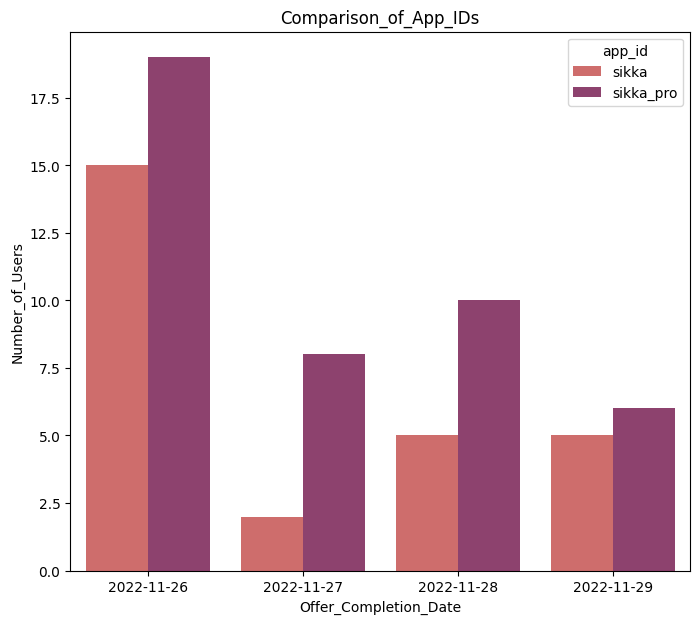

In [43]:
#Plotting a barchart
plt.figure(figsize= (8,7))
sns.barplot(y='user_count', x='date', data= offer_completion_per_per_day_basis, hue='app_id', palette ='flare')
plt.xlabel('Offer_Completion_Date')
plt.ylabel('Number_of_Users')
plt.title('Comparison_of_App_IDs')
plt.show()

In [44]:
offer_completion_per_app = offer_completion.groupby(['app_id'])['user_id'].count().reset_index()
offer_completion_per_app

,app_id,user_id
0,sikka,27
1,sikka_pro,43


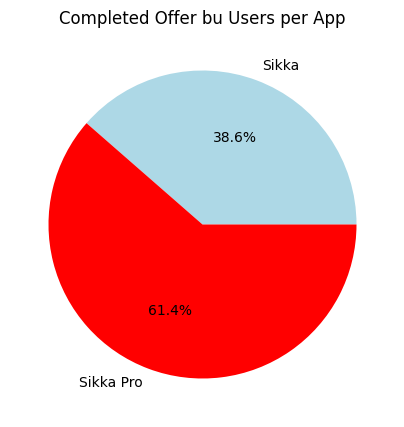

In [45]:
#plotting a pie-chart
plt.figure(figsize = [5,5])
plt.pie(offer_completion_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['lightblue','red'])
plt.title('Completed Offer bu Users per App')
plt.show()

In [46]:
#reward_earned_by_user
reward_earned = pd.merge(offer_completion, Rewards_Details, on='reward_id')

In [47]:
reward_earned

,reward_id,user_id,date,app_id,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,3712,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,3520,Complete Registration,500,1758
1,935,4cb29e43-9f23-42fe-bab8-2422f42e7a91,2022-11-29,sikka,792,Complete Registration,200,0
2,935,c925ccad-98e7-4500-833e-a49aa066aeec,2022-11-26,sikka,792,Complete Registration,200,0
3,935,3db62aad-421b-474e-9b1e-8a88ff370d4f,2022-11-26,sikka,792,Complete Registration,200,0
4,935,805763d6-87b3-40c7-bb84-dd663669c836,2022-11-27,sikka_pro,792,Complete Registration,200,0
...,...,...,...,...,...,...,...,...
65,3733,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro,3539,Complete Install,32,106
66,3734,94c1a32a-de5c-4911-b7ad-f245a57b6d10,2022-11-28,sikka_pro,3540,Complete Install,32,106
67,3734,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-29,sikka_pro,3540,Complete Install,32,106
68,3705,417bcb37-44cf-43c3-ba51-5d39c825caf7,2022-11-27,sikka_pro,3513,Register,500,2500


In [48]:

reward_earned_per_app=reward_earned.groupby('app_id')['total_payout_in_paise'].sum().reset_index()
reward_earned_per_app

,app_id,total_payout_in_paise
0,sikka,18466
1,sikka_pro,19618


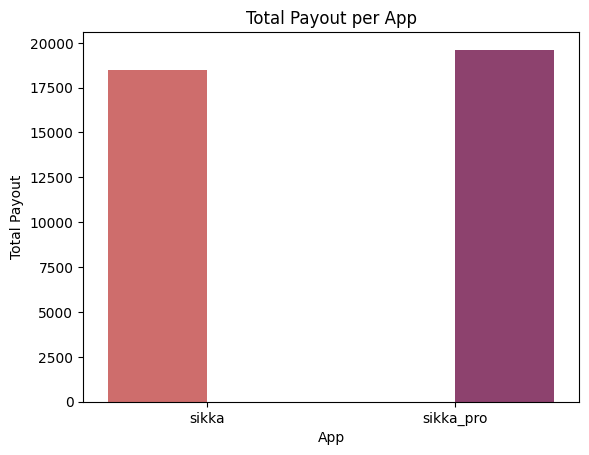

In [49]:
#Plotting a bar chart
sns.barplot(y='total_payout_in_paise', x='app_id', data= reward_earned_per_app, hue='app_id',palette = 'flare')
plt.xlabel('App')
plt.ylabel('Total Payout')
plt.title('Total Payout per App')
plt.legend('',frameon=False)
plt.show()

In [50]:
num_reward_earned_per_app = reward_earned.groupby('app_id')['user_id'].count().reset_index()
num_reward_earned_per_app

,app_id,user_id
0,sikka,27
1,sikka_pro,43


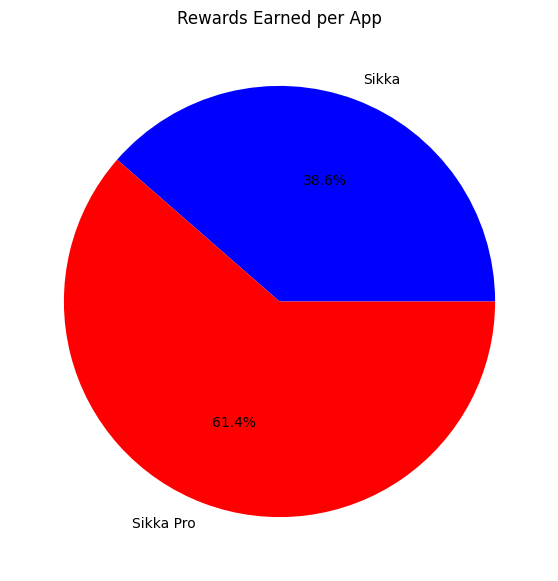

In [51]:
#plotting a pie cahrt

plt.figure(figsize = [7,7])
sns.color_palette(palette="Paired")
plt.pie(num_reward_earned_per_app['user_id'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['blue','red'])
plt.title('Rewards Earned per App')
plt.show()

In [52]:
#revenue generated_per_app


In [53]:
revenue_generated = pd.merge(User_signup, reward_earned, on=['user_id','app_id'])
revenue_generated

,user_id,app_id,signed_up_on,last_login_date,reward_id,date,offer_id,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,c925ccad-98e7-4500-833e-a49aa066aeec,sikka,2022-11-26,2022-11-26,935,2022-11-26,792,Complete Registration,200,0
1,f55000a3-dd68-44d8-b461-41c85d963ce2,sikka,2022-11-26,2022-11-27,3172,2022-11-26,2945,Download,34,100
2,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,935,2022-11-26,792,Complete Registration,200,0
3,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,3720,2022-11-27,3528,Complete Registration.,250,700
4,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,3702,2022-11-26,3510,Register,600,2000
...,...,...,...,...,...,...,...,...,...,...
65,805763d6-87b3-40c7-bb84-dd663669c836,sikka_pro,2022-11-26,2022-11-27,3156,2022-11-27,2931,Download,50,300
66,805763d6-87b3-40c7-bb84-dd663669c836,sikka_pro,2022-11-26,2022-11-27,3572,2022-11-27,3382,Register,800,4000
67,792b3da8-618b-4bbe-996c-63f45820327a,sikka_pro,2022-11-26,2022-11-27,3172,2022-11-26,2945,Download,34,100
68,0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,sikka_pro,2022-11-26,2022-11-29,3722,2022-11-29,3529,Install,200,600


In [54]:
Total_revenue_per_app = revenue_generated.groupby("app_id")['total_revenue_in_paise'].sum().reset_index()
Total_revenue_per_app

,app_id,total_revenue_in_paise
0,sikka,39687
1,sikka_pro,40457


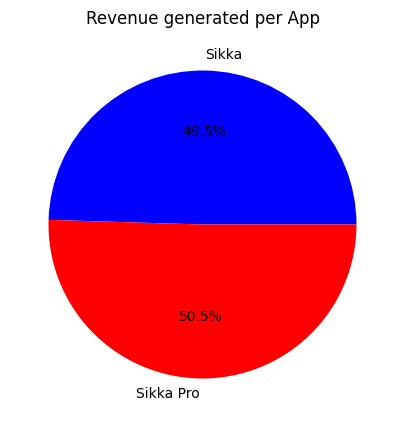

In [55]:
#Plotting a pie-chart
plt.figure(figsize = [5,5])
sns.color_palette(palette="Paired")
plt.pie(Total_revenue_per_app['total_revenue_in_paise'],labels = ['Sikka',"Sikka Pro"], autopct='%1.1f%%',colors = ['blue','red'])
plt.title('Revenue generated per App')
plt.show()

In [56]:
revenue_per_app_per_day = revenue_generated.groupby(["app_id","last_login_date"])['total_revenue_in_paise'].sum().reset_index()
revenue_per_app_per_day

,app_id,last_login_date,total_revenue_in_paise
0,sikka,2022-11-26,2706
1,sikka,2022-11-27,100
2,sikka,2022-11-28,800
3,sikka,2022-11-29,36081
4,sikka_pro,2022-11-26,6625
5,sikka_pro,2022-11-27,6600
6,sikka_pro,2022-11-28,4104
7,sikka_pro,2022-11-29,23128


In [57]:
#changing_paise to rupees
revenue_per_app_per_day['total_revenue'] = revenue_per_app_per_day['total_revenue_in_paise']/100
revenue_per_app_per_day

,app_id,last_login_date,total_revenue_in_paise,total_revenue
0,sikka,2022-11-26,2706,27.06
1,sikka,2022-11-27,100,1.00
2,sikka,2022-11-28,800,8.00
3,sikka,2022-11-29,36081,360.81
4,sikka_pro,2022-11-26,6625,66.25
5,sikka_pro,2022-11-27,6600,66.00
6,sikka_pro,2022-11-28,4104,41.04
7,sikka_pro,2022-11-29,23128,231.28


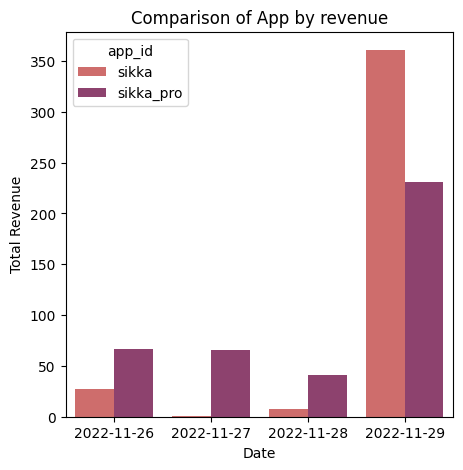

In [58]:
#Plotting a bar chart
plt.figure(figsize= (5,5))
sns.barplot(y='total_revenue', x='last_login_date', data=revenue_per_app_per_day, hue='app_id', palette ='flare')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Comparison of App by revenue')
plt.show()